In [2]:
import exploration
import pandas as pd
import datetime
from datetime import datetime
import datapreprocessing
import modeling

In [4]:
#concatenate outcomes and projects into a combined table, and drop irrelevant features
path_outcomes = "../outcomes/outcomes.csv"
df_outcomes = exploration.read_data(path_outcomes, index_col = "projectid")

path_projects = "../projects/projects.csv"
df_projects = exploration.read_data(path_projects, index_col = "projectid")
df_projects["date_posted"] = pd.to_datetime(df_projects["date_posted"])
date_lb = pd.Timestamp(datetime(2011, 1, 1))
date_ub = pd.Timestamp(datetime(2013, 12, 31))
date_filter = (df_projects["date_posted"] >= date_lb) & \
(df_projects["date_posted"] <= date_ub)
df_projects = df_projects[date_filter].copy()
df = df_projects.join(df_outcomes)
df = df.drop(["teacher_acctid", "schoolid", "school_ncesid", "school_latitude",\
 "school_longitude","school_city", "school_state", "school_district", \
 "school_county", "teacher_prefix"], axis = 1).copy()

In [7]:
#classify features into different categories
categorical_vars_with_nan = ["school_metro", "primary_focus_subject", \
"primary_focus_area", "secondary_focus_subject", "secondary_focus_area", \
"resource_type", "grade_level", \
"at_least_1_teacher_referred_donor", "at_least_1_green_donation", \
"three_or_more_non_teacher_referred_donors", \
"one_non_teacher_referred_donor_giving_100_plus", \
"donation_from_thoughtful_donor", "fully_funded"]

numerical_vars_with_nan = ["students_reached", "great_messages_proportion", \
"teacher_referred_count", "non_teacher_referred_count"]

categorical_vars = ["school_metro", "school_charter", \
"school_magnet", "school_year_round", "school_nlns", "school_kipp", \
"school_charter_ready_promise", "teacher_teach_for_america", \
"teacher_ny_teaching_fellow", "primary_focus_subject", "primary_focus_area", \
"secondary_focus_subject", "secondary_focus_area", "resource_type", \
"poverty_level", "grade_level", "eligible_double_your_impact_match", \
"eligible_almost_home_match", "is_exciting", "at_least_1_teacher_referred_donor", \
"at_least_1_green_donation", "great_chat", \
"three_or_more_non_teacher_referred_donors", \
"one_non_teacher_referred_donor_giving_100_plus", "donation_from_thoughtful_donor"]

In [8]:
#data imputation for exploration purpose
datapreprocessing.imputation(df, categorical_vars_with_nan, fill_type = None, value = "unknown", \
    output = False)
datapreprocessing.imputation(df, numerical_vars_with_nan, fill_type = "mean", \
    value = None, output = False)
datapreprocessing.encode_label(df, categorical_vars)

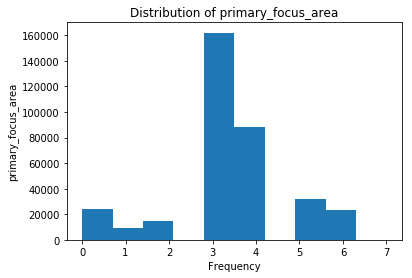

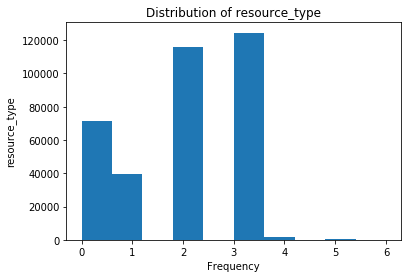

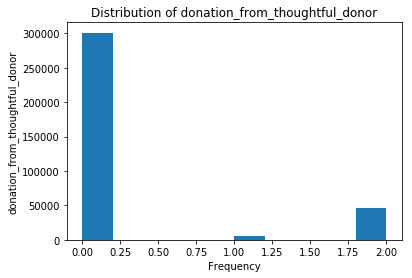

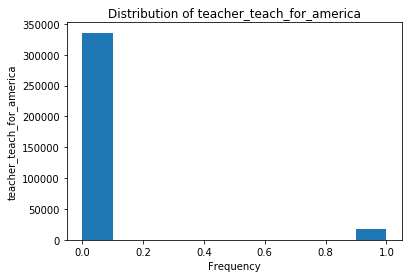

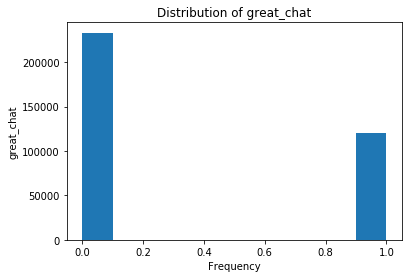

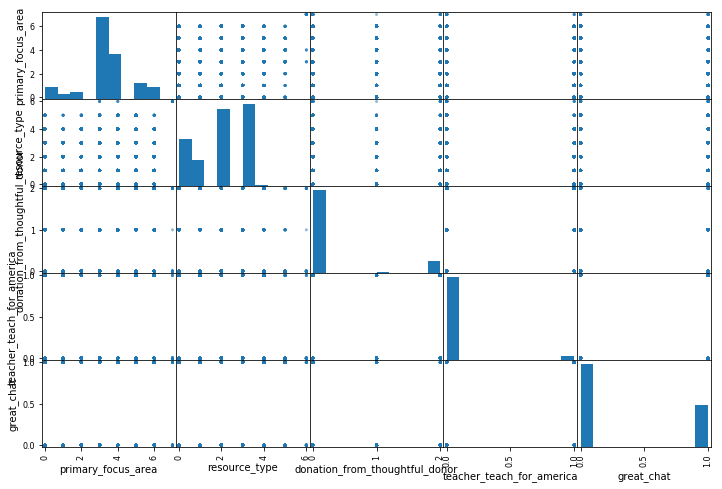

In [11]:
#plot histogram and scatter matrix of different features
vars = ["primary_focus_area", "resource_type", \
        "donation_from_thoughtful_donor", "teacher_teach_for_america", "great_chat"]
for var in vars:
    exploration.plot_hist(df, var, 10)

exploration.plot_scatter_matrix(df, ["fully_funded", "primary_focus_area", "resource_type", \
                                     "donation_from_thoughtful_donor", "teacher_teach_for_america", "great_chat"])

In [12]:
#The graph of Distribution of primary_focus_area above shows that primary focus area of projects 
#are concentrated on two types which are 'Math & Science', 'Literacy & Language'.
#LabalEncoding code:primary_focus_area [6 4 3 0 2 5 1 7] ['Special Needs', 'Math & Science', 
#'Literacy & Language', 'Applied Learning', 'History & Civics', 'Music & The Arts', 'Health & Sports', 'unknown']

#Distribution of resource_type shows that resources mainly comprise 'Technology', 'Supplies', 'Books' and 'Other'
#Code: resource_type [1 2 3 0 4 5 6] ['Other', 'Supplies', 'Technology', 'Books', 'Trips', 'Visitors', 'unknown']

#Distribution of donation_from_thoughtful_donor implies that most of the projects didn't receive donations from
#thoughtful donor
#Code: donation_from_thoughtful_donor [0 2 1] ['f', 'unknown', 't']

#Distribution of teacher_teach_for_america tells that there is barely involvement of teachers from teach for america
#in those projects
#Code: teacher_teach_for_america [0 1] ['f', 't']

#Same as with the Distribution of great_chat, there is a scarcity of great chats shown in those projects

#Finally, the scatter matrix shows that there are no strong correlations between the selected features